In [1]:
import numpy as np
import h5py

import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

import seaborn as sns
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 3})
sns.set_style('whitegrid',
              {'grid.linestyle': ':', 'grid.color': 'red', 'axes.edgecolor': '0.5',
               'axes.linewidth': 1.2, 'legend.frameon': True})

In [3]:
!mkdir -p vid_poincare

In [6]:
with h5py.File('particlemonitor.h5part', 'r') as fp:
    n_steps = len([st for st in fp.keys() if 'Step' in st])
    n_stored_particles = len(fp['Step#0']['x'])
    
    rec_inc_x = np.empty((n_steps, n_stored_particles), dtype=np.float32)
    rec_inc_xp = np.empty_like(rec_inc_x)
    
    for i in range(n_steps):
        rec_inc_x[i, :] = fp['Step#{}'.format(i)]['x']
        rec_inc_xp[i, :] = fp['Step#{}'.format(i)]['xp']

In [8]:
def get_action(u, up, dp=None, alpha_twiss=0, beta_twiss=1.677764673, disp=0):
    if disp and dp.any():
        u = u - disp * dp
    gamma_twiss = (1 + alpha_twiss**2) / beta_twiss
    J = 0.5 * (gamma_twiss * u**2 + 2*alpha_twiss * u * up + beta_twiss * up**2)
    return J

In [10]:
id_max = np.argmax(get_action(rec_inc_x[-1], rec_inc_xp[-1]))
id_max

389

In [83]:
n_turns_tot = 5000

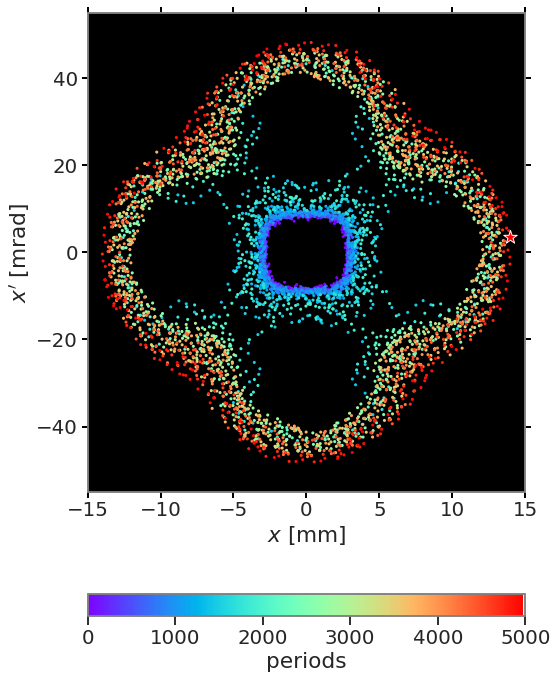

In [86]:
plt.figure(figsize=(8, 10))
plt.subplots_adjust(left=0.17, bottom=0.0, top=0.95, right=0.93)

for i, n_turns in enumerate(np.linspace(0, n_turns_tot, 25*30, dtype=int)[1:]):
    plt.clf()
    plt.scatter(rec_inc_x[:n_turns, id_max] * 1e3, rec_inc_xp[:n_turns, id_max] * 1e3, marker='.', 
                s=10, c=np.arange(n_turns), vmax=n_turns_tot, cmap=plt.get_cmap('rainbow'))
    cbar = plt.colorbar(orientation='horizontal')
    cbar.set_label('periods')
    plt.scatter(rec_inc_x[n_turns-1, id_max] * 1e3, rec_inc_xp[n_turns-1, id_max] * 1e3, marker='*', 
                edgecolors='white', s=200, c='red', linewidths=1)
    # plt.hist2d(pyht_beam.x[peak_ids] * 1e3, pyht_beam.xp[peak_ids] * 1e3, bins=100);
    plt.xlabel('$x$ [mm]')
    plt.ylabel(r"$x'$ [mrad]")
    plt.gca().set_facecolor('black')
    plt.xlim(-15, 15)
    plt.ylim(-55, 55)
    # plt.title('Motion of 1 particle for 5000 cells')
    plt.gca().tick_params(direction='out', length=6, width=2, color='black', reset=True, grid_linestyle='None')
    
    plt.sca(cbar.ax)
    plt.axvline(n_turns, color='white', lw=5)
    plt.savefig('vid_poincare/{:03d}.png'.format(i), dpi=150)

In [87]:
!cd vid_poincare/ && ffmpeg -pattern_type glob -i '*.png' -c:v libx264 -pix_fmt yuv420p vid.mp4 -y

ffmpeg version 4.1.3-0ubuntu1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 8 (Ubuntu 8.3.0-6ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx